# <p style="border-radius: 10px; border: solid rgb(222, 184, 135); padding: 25px; background-color: rgb(255, 250, 240); font-size: 100%; color: rgb(82, 1, 122); text-align: center; --darkreader-inline-border-top: #744f20; --darkreader-inline-border-right: #744f20; --darkreader-inline-border-bottom: #744f20; --darkreader-inline-border-left: #744f20; --darkreader-inline-bgcolor: #3c2800; --darkreader-inline-color: #d177fe;">EDA</p>

<h1 class="alert alert-info">
Data Analysis and Data Pre-processing</h1>

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset
df = pd.read_csv("../data/merged_dataset.csv")

# rows and columns of the data
print(df.shape)

# visualise the dataset
df.head()

(4954, 58)


,DATE,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION,AVOIRS_OFFICIELS_DE_RESERVE,OR_MONETAIRE,MONNAIES_ETRANGERES,DEPOTS_ET_TITRES,POSITION_DE_RESERVE_AU_FMI,AVOIRS_EN_DTS,INFLATION,INFLATION_SOUS_JACENTE,Cours Minimum,Cours Maximum,NOMINAL 1 AN,NOMINAL 1 MOIS,NOMINAL 10 ANS,NOMINAL 15 ANS,NOMINAL 2 ANS,NOMINAL 20 ANS,NOMINAL 25 ANS,NOMINAL 3 ANS,NOMINAL 3 MOIS,NOMINAL 30 ANS,NOMINAL 5 ANS,NOMINAL 6 MOIS,AGROALIMENTAIRE & PRODUCTION,ASSURANCES,BANQUES,BATIMENT & MATERIAUX DE CONSTRUCTION,BOISSONS,CHIMIE,DISTRIBUTEURS,ELECTRICITE,EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES,INDUSTRIE PHARMACEUTIQUE,INGENIERIES & BIENS D’EQUIPEMENT INDUSTRIELS,LOISIRS ET HOTELS,"MATERIELS,LOGICIELS & SERVICES INFORMATIQUES",MINES,PARTICIPATION ET PROMOTION IMMOBILIERES,PETROLE & GAZ,SERVICES AUX COLLECTIVITES,SERVICES DE TRANSPORT,SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINANCIERES,SOCIETES DE PLACEMENT IMMOBILIER,SOCIETES DE PORTEFEUILLES - HOLDINGS,SYLVICULTURE & PAPIER,TELECOMMUNICATIONS,TRANSPORT,Indice MONIA,Volume JJ,TAUX MOYEN PONDERE,VOLUME JJ,ENCOURS
0,2021-12-31,13358.32,13425.50,13352.00,13404.63,13404.63,-0.35,330.831808,12.008623,15.920088,281.985439,1.913919,19.003739,8.3,8.3,9.1903,10.1577,149.221429,143.795302,195.967993,217.586787,154.886878,220.739292,221.791454,159.765023,144.060768,218.645681,170.049137,145.380741,37033.050781,5521.850098,14106.230469,21529.349609,16027.469727,6307.509766,47830.968750,2346.370117,999.260010,8294.540039,120.660004,496.679993,2763.070068,25607.640625,3436.810059,21479.500000,983.539978,4306.149902,8853.259766,1001.080017,5008.120117,29.809999,2046.709961,2562.300049,1.456,14202.0,1.5,4917.0,8607.0
1,2021-12-31,13358.32,13425.50,13352.00,13404.63,13404.63,-0.35,330.831808,12.008623,15.920088,281.985439,1.913919,19.003739,8.3,8.3,9.1858,10.1527,149.221429,143.795302,195.967993,217.586787,154.886878,220.739292,221.791454,159.765023,144.060768,218.645681,170.049137,145.380741,37033.050781,5521.850098,14106.230469,21529.349609,16027.469727,6307.509766,47830.968750,2346.370117,999.260010,8294.540039,120.660004,496.679993,2763.070068,25607.640625,3436.810059,21479.500000,983.539978,4306.149902,8853.259766,1001.080017,5008.120117,29.809999,2046.709961,2562.300049,1.456,14202.0,1.5,4917.0,8607.0
2,2021-12-30,13404.63,13405.19,13340.30,13389.20,13389.20,0.12,330.697598,11.983168,15.826980,281.982649,1.912748,18.992053,8.3,8.3,9.1885,10.1558,149.215415,143.789199,196.029692,217.577083,154.845752,220.725313,222.175406,159.762841,144.054723,216.823343,170.085174,145.361942,37488.011719,5512.000000,14094.629883,21484.810547,15839.519531,6539.520020,47968.441406,2458.100098,998.369995,8280.480469,122.169998,468.630005,2808.389893,26085.660156,3493.129883,21754.500000,987.500000,4369.229980,9091.240234,996.340027,5008.120117,29.820000,2043.770020,2562.300049,1.437,8915.0,1.5,5357.0,9287.0
3,2021-12-30,13404.63,13405.19,13340.30,13389.20,13389.20,0.12,330.563387,11.957713,15.733872,281.979859,1.911576,18.980367,8.3,8.3,9.1888,10.1560,149.215415,143.789199,196.029692,217.577083,154.845752,220.725313,222.175406,159.762841,144.054723,216.823343,170.085174,145.361942,37488.011719,5512.000000,14094.629883,21484.810547,15839.519531,6539.520020,47968.441406,2458.100098,998.369995,8280.480469,122.169998,468.630005,2808.389893,26085.660156,3493.129883,21754.500000,987.500000,4369.229980,9091.240234,996.340027,5008.120117,29.820000,2043.770020,2562.300049,1.437,8915.0,1.5,5357.0,9287.0
4,2021-12-29,13389.20,13389.70,13280.96,13281.80,13281.80,0.81,330.429177,11.932258,15.640763,281.977069,1.910405,18.968682,8.3,8.3,9.1958,10.1638,149.210740,143.783095,195.939486,217.462340,154.885255,220.503661,220.706776,159.799980,144.049648,217.460305,169.985386,145.374614,37365.700521,5481.500000,14059.500000,21509.109375,15881.440430,6539.520020,47007.371094,2469.270020,993.010010,8320.980469,119.190002,475.640015,2809.610107,26048.119141,3544.270020,22290.439453,1041.670044,4323.080078,9165.120117,

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 58 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   DATE                                                   4954 non-null   object 
 1   COURS_CLOTURE                                          4954 non-null   float64
 2   COURS_PLUS_HAUT                                        4954 non-null   float64
 3   COURS_PLUS_BAS                                         4954 non-null   float64
 4   COURS_OUVERTURE                                        4954 non-null   float64
 5   COURS_VEILLE                                           4954 non-null   float64
 6   VARIATION                                              4954 non-null   float64
 7   AVOIRS_OFFICIELS_DE_RESERVE                            4954 non-null   float64
 8   OR_MONETAIRE                                    

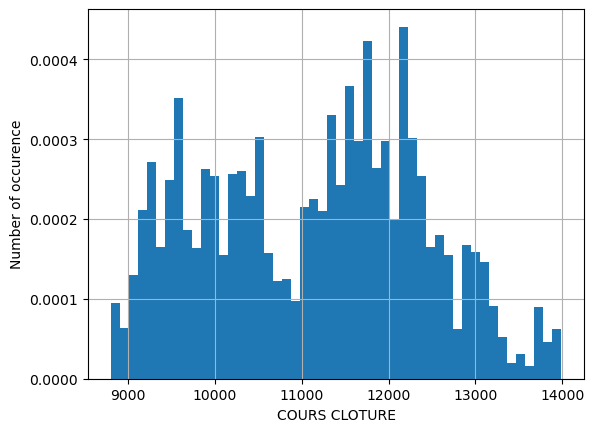

In [4]:
# histogran to evaluate target distribution

df['COURS_CLOTURE'].hist(bins=50, density=True)
plt.ylabel('Number of occurence')
plt.xlabel('COURS CLOTURE')
plt.show()

<h3 class="alert alert-info">
Statistical properties of the series<h3>

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ADF test
from statsmodels.tsa.stattools import adfuller

# difined copy df for this section 
def df_properties(df, index_col):

    df_processed = df.copy()

    df_processed[index_col] = pd.to_datetime(df_processed[index_col])

    df_processed.set_index(index_col, inplace=True)
    
    df_processed.sort_index(ascending=True, inplace=True)#p-f

    return df_processed

df_prop = df_properties(df, 'DATE')


<Axes: title={'center': 'COURS_CLOTURE'}, xlabel='time', ylabel='COURS_CLOTURE'>

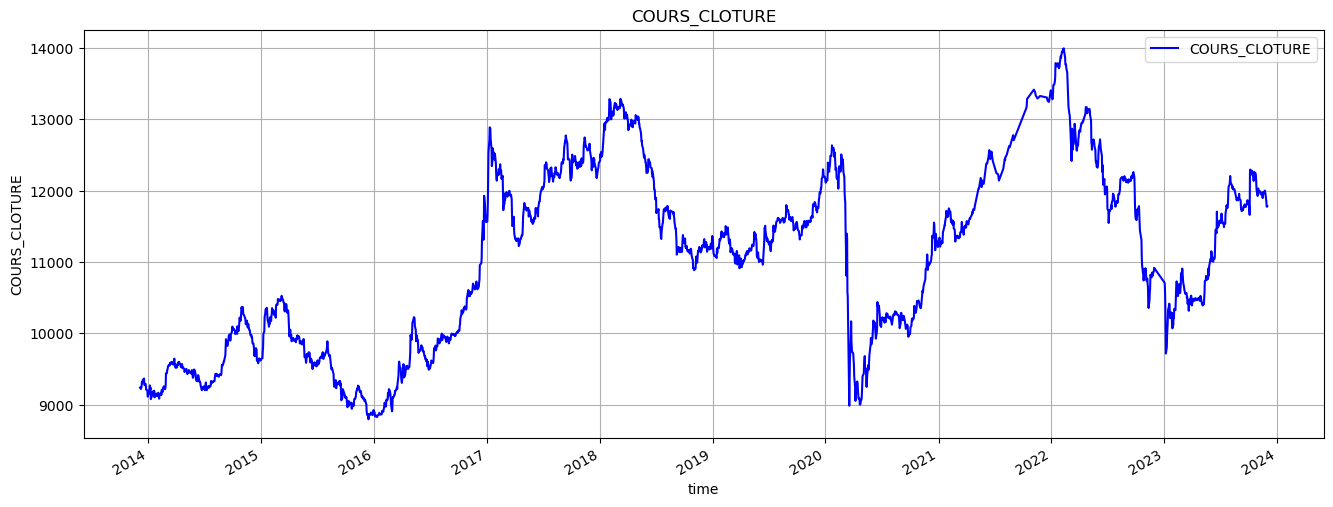

In [66]:
# its loook like a non-Stationary timeS. this means  the statistical properties change over time

df_prop['COURS_CLOTURE'].plot(
    kind='line',        
    figsize=(16, 6),      
    title='COURS_CLOTURE', 
    xlabel='time',       
    ylabel='COURS_CLOTURE', 
    color='blue',         
    markersize=8,         
    grid=True,            
    legend=True)

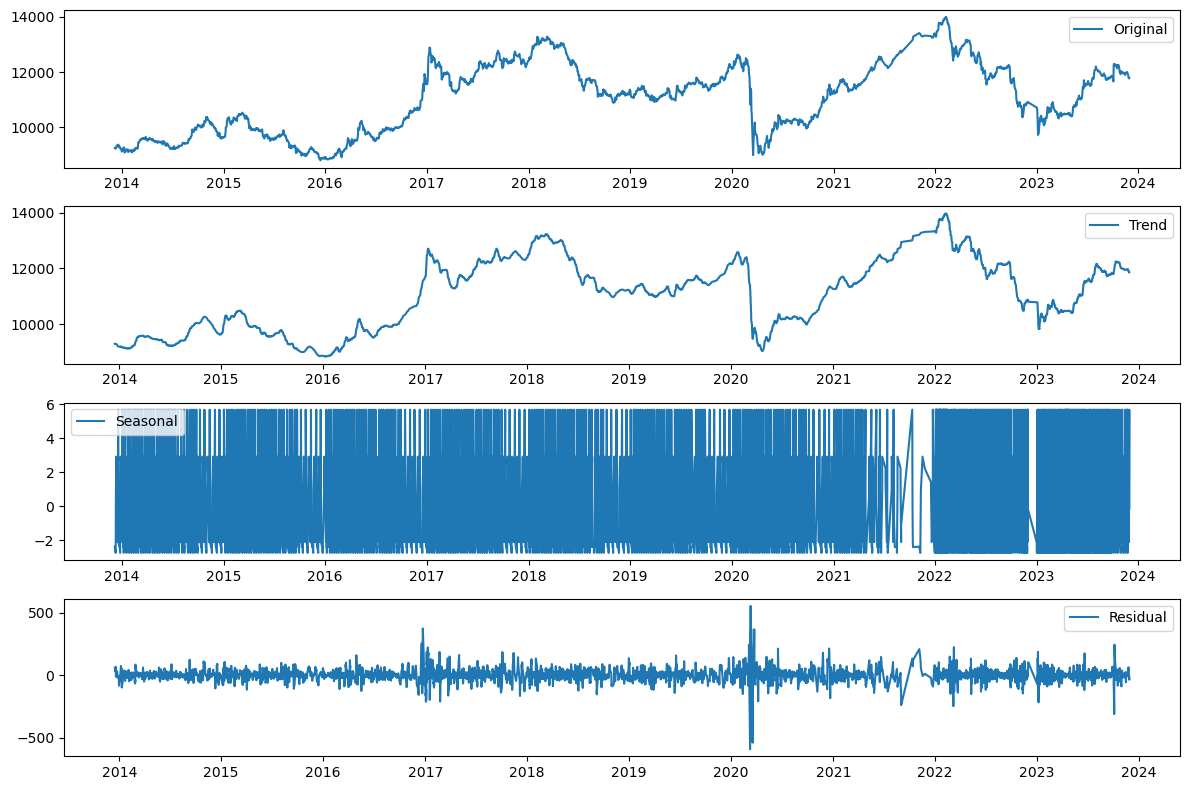

In [69]:
# Time series decomposition
ts = df_prop['COURS_CLOTURE']

result = seasonal_decompose(ts, model='additive', period=12) 

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(ts, label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual',)
plt.legend()

plt.tight_layout()
plt.show()

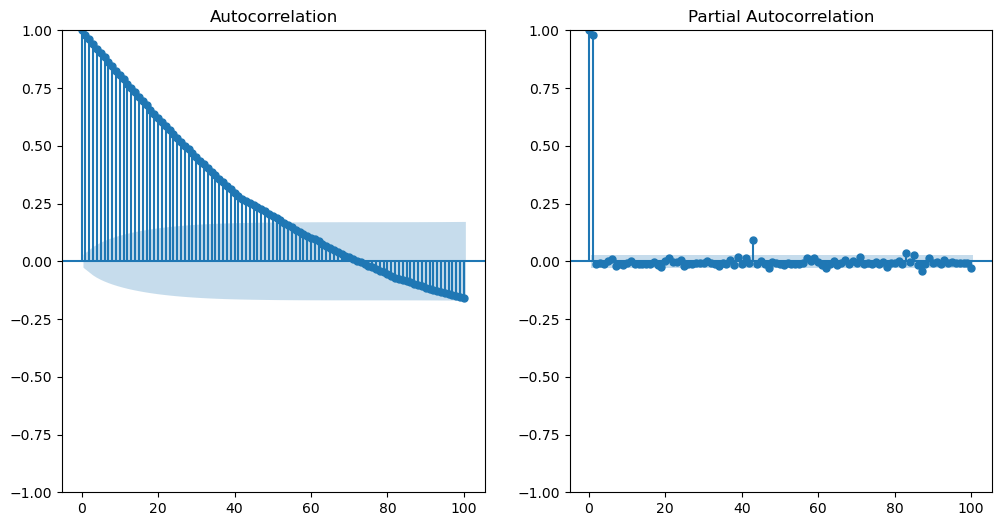

In [81]:
# Plot ACF - PACF
def plot_acf_pacf(ts, lags=100):
    plt.figure(figsize=(12, 6))
    ax1 = plt.subplot(121)
    plot_acf(ts, lags=lags, ax=ax1)

    ax2 = plt.subplot(122)
    plot_pacf(ts, lags=lags, ax=ax2)

    plt.show()

plot_acf_pacf(ts)

- Auto correlation Function (__ACF__) plots the correlation coefficient against the lag, and it’s a visual representation of autocorrelation.[1]
- A partial autocorrelation(__PACF__) function captures a direct correlation between time series and a lagged version of itself.

In [75]:
# df_prop['seasonal'] = tsm_decompose.seasonal
# df_prop['trend'] = tsm_decompose.trend

## 1-1 ADF (Augmented Dickey Fuller) Test
- this test can help us to determine whether a time series is stationary or not.

- __H0:__ Null Hypothesis: The series has a unit root (value of a =1) # this means non-stationary 
- __H1:__ Alternate Hypothesis: The series has no unit root.

In [56]:
# Perform Dickey-Fuller test 

p_value = 0.05

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        return dfoutput


result = adf_test(df_prop['COURS_CLOTURE'])
print(result)    
print('-'*80)
if result['p-value'] <= p_value:
    print('Reject the null hypothesis. The time series is likely stationary.')
else:
    print('Fail to reject the null hypothesis. The time series is likely non-stationary.')


Results of Dickey-Fuller Test:
Test Statistic                   -2.353596
p-value                           0.155264
#Lags Used                       22.000000
Number of Observations Used    4931.000000
Critical Value (1%)              -3.431677
dtype: float64
--------------------------------------------------------------------------------
Fail to reject the null hypothesis. The time series is likely non-stationary.


__Note__: 

- From the above representations, we can conclude that the series is non-stationary. If we want to model this series, we can     use models that are specifically designed to handle trends and seasonality (SARIMA, ETS, LSTM ..).

__references :__

[1] https://medium.com/@ritusantra/auto-correlation-function-acf-and-partial-auto-correlation-function-pacf-e29ec2db2b1b


<h3 class="alert alert-info">
Feature Enginnering<h3>

<div class="alert alert-info">
Missing value<div>

We are already filling the missing values in the last notebook

In [86]:
df.isna().sum().sum()

0

<div class="alert alert-info">
Outliers<div>

- Identify outliers using statistical methods (e.g., Z-score or IQR).
- Remove the rows containing outliers.

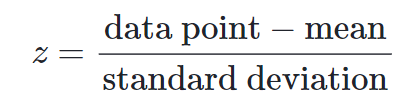

In [87]:
# from scipy import stats

# z_scores = stats.zscore(df)
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# df = df[filtered_entries]

<div class="alert alert-info">
Distribution<div>

<div class="alert alert-info">
DateTime variables<div>

Day, month, semester, hour, min, s

In [88]:
import pandas as pd
import numpy as np

def process_features(df):
    
    # Convert to datetime
#     df['Date'] = pd.to_datetime(df['Date'])
    
    # Sort by date
    df = df.sort_values(by='DATE', ascending=True)
    
    # Time-Based Features
    df['month'] = pd.to_datetime(df['DATE']).dt.month
    df['weekday'] = pd.to_datetime(df['DATE']).dt.dayofweek
    df["weekend"] = df['weekday'] > 4
#     df['hour'] = pd.to_datetime(df['DATE']).dt.hour
#     df['minute'] = pd.to_datetime(df['DATE']).dt.minute 
#     df.set_index('DATE', inplace=True)
    
    # Season feature
    df['Season'] = np.where(df['month'].isin([3, 4, 5]), 'Spring',
                            np.where(df['month'].isin([6, 7, 8]), 'Summer',
                            np.where(df['month'].isin([9, 10, 11, 12, 1, 2]), 'Fall', 'Winter')))

    
    
    # One-Hot Encoding for categorical columns
#     df = pd.get_dummies(df, columns=['Season', 'day', 'category_1', 'category_2'])
        
    return df

In [89]:
df = process_features(df)
df.head()

,DATE,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION,AVOIRS_OFFICIELS_DE_RESERVE,OR_MONETAIRE,MONNAIES_ETRANGERES,DEPOTS_ET_TITRES,POSITION_DE_RESERVE_AU_FMI,AVOIRS_EN_DTS,INFLATION,INFLATION_SOUS_JACENTE,Cours Minimum,Cours Maximum,NOMINAL 1 AN,NOMINAL 1 MOIS,NOMINAL 10 ANS,NOMINAL 15 ANS,NOMINAL 2 ANS,NOMINAL 20 ANS,NOMINAL 25 ANS,NOMINAL 3 ANS,NOMINAL 3 MOIS,NOMINAL 30 ANS,NOMINAL 5 ANS,NOMINAL 6 MOIS,AGROALIMENTAIRE & PRODUCTION,ASSURANCES,BANQUES,BATIMENT & MATERIAUX DE CONSTRUCTION,BOISSONS,CHIMIE,DISTRIBUTEURS,ELECTRICITE,EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES,INDUSTRIE PHARMACEUTIQUE,INGENIERIES & BIENS D’EQUIPEMENT INDUSTRIELS,LOISIRS ET HOTELS,"MATERIELS,LOGICIELS & SERVICES INFORMATIQUES",MINES,PARTICIPATION ET PROMOTION IMMOBILIERES,PETROLE & GAZ,SERVICES AUX COLLECTIVITES,SERVICES DE TRANSPORT,SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINANCIERES,SOCIETES DE PLACEMENT IMMOBILIER,SOCIETES DE PORTEFEUILLES - HOLDINGS,SYLVICULTURE & PAPIER,TELECOMMUNICATIONS,TRANSPORT,Indice MONIA,Volume JJ,TAUX MOYEN PONDERE,VOLUME JJ,ENCOURS,month,weekday,weekend,Season
177,2013-12-06,9240.41,9340.03,9240.39,9310.02,9327.31,-0.009317,349.865853,14.191342,11.426886,303.314222,1.977989,18.955415,8.3,8.3,9.365992,10.351875,154.593025,150.414897,180.678428,187.229134,158.508979,180.604453,172.518633,161.286817,150.336228,163.936077,167.263579,151.370658,31801.412143,5006.905,13359.142381,18560.281667,14585.499286,4183.715536,38372.916488,2255.716369,2071.234494,5866.859762,88.522857,934.742083,2458.707679,22809.748393,5798.094524,15343.102381,1048.016558,4185.055714,7488.461369,1041.993571,5538.568929,29.415833,1368.041667,2414.6275,2.947966,8495.827586,2.991124,1762.846154,7030.650888,12,4,False,Fall
176,2013-12-09,9221.40,9277.00,9199.47,9235.06,9240.41,-0.002057,349.470283,14.174735,11.512905,302.931208,1.977482,18.873953,8.3,8.3,9.364884,10.350650,154.547102,150.363092,180.738401,187.356265,158.469820,180.797419,172.742118,161.257384,150.286585,164.195697,167.257344,151.322524,31796.374286,5003.180,13352.244762,18548.653333,14583.658571,4182.481071,38331.562976,2254.452738,2081.928539,5849.489524,88.395714,932.234167,2458.815357,22800.006786,5778.049048,15340.654762,1051.071129,4179.341429,7488.212738,1041.287143,5537.097857,29.351667,1372.593333,2414.3950,2.942931,8508.655172,2.982249,1765.692308,7031.301775,12,0,False,Fall
175,2013-12-10,9241.40,9263.15,9196.77,9203.46,9221.40,0.002169,349.074712,14.158127,11.598925,302.548194,1.976975,18.792491,8.3,8.3,9.363775,10.349425,154.501179,150.311287,180.798374,187.483396,158.430662,180.990385,172.965602,161.227952,150.236942,164.455318,167.251109,151.274390,31791.336429,4999.455,13345.347143,18537.025000,14581.817857,4181.246607,38290.209464,2253.189107,2092.622584,5832.119286,88.268571,929.726250,2458.923036,22790.265179,5758.003571,15338.207143,1054.125701,4173.627143,7487.964107,1040.580714,5535.626786,29.287500,1377.145000,2414.1625,2.937897,8521.482759,2.973373,1768.538462,7031.952663,12,1,False,Fall
174,2013-12-11,9252.30,9252.30,9194.57,9239.97,9241.40,0.001179,348.679142,14.141520,11.684944,302.165180,1.976468,18.711030,8.3,8.3,9.362667,10.348199,154.455256,150.259481,180.858347,187.610527,158.391504,181.183351,173.189086,161.198519,150.187300,164.714938,167.244873,151.226256,31786.298571,4995.730,13338.449524,18525.396667,14579.977143,4180.012143,38248.855952,2251.925476,2103.316629,5814.749048,88.141429,927.218333,2459.030714,22780.523571,5737.958095,15335.759524,1057.180272,4167.912857,7487.715476,1039.874286,5534.155714,29.223333,1381.696667,2413.9300,2.932862,8534.310345,2.964497,1771.384615,7032.603550,12,2,False,Fall
173,2013-12-12,9320.66,9320.66,9241.91,9241.91,9252.30,0.007388,348.283571,14.124913,11.770964,301.782166,1.975960,18.629568,8.3,8.3,9.361559,10.346974,154.409333,150.207676,180.918319,187.737658,158.352345,181.376317,173.412570,161.169087,150.137657,164.974558,167.238638,151.178122,31781.260714,4992.005,13331.551905,185

### Encode variables

In [90]:
# Encode 'Season' using label encoding because there is an ordinal relationship (Spring < Summer < Fall < Winter)
season_mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
df['Season'] = df['Season'].map(season_mapping)

# Encode 'weekday' using cyclical encoding
df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 6)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 6)


df.head()

,DATE,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION,AVOIRS_OFFICIELS_DE_RESERVE,OR_MONETAIRE,MONNAIES_ETRANGERES,DEPOTS_ET_TITRES,POSITION_DE_RESERVE_AU_FMI,AVOIRS_EN_DTS,INFLATION,INFLATION_SOUS_JACENTE,Cours Minimum,Cours Maximum,NOMINAL 1 AN,NOMINAL 1 MOIS,NOMINAL 10 ANS,NOMINAL 15 ANS,NOMINAL 2 ANS,NOMINAL 20 ANS,NOMINAL 25 ANS,NOMINAL 3 ANS,NOMINAL 3 MOIS,NOMINAL 30 ANS,NOMINAL 5 ANS,NOMINAL 6 MOIS,AGROALIMENTAIRE & PRODUCTION,ASSURANCES,BANQUES,BATIMENT & MATERIAUX DE CONSTRUCTION,BOISSONS,CHIMIE,DISTRIBUTEURS,ELECTRICITE,EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES,INDUSTRIE PHARMACEUTIQUE,INGENIERIES & BIENS D’EQUIPEMENT INDUSTRIELS,LOISIRS ET HOTELS,"MATERIELS,LOGICIELS & SERVICES INFORMATIQUES",MINES,PARTICIPATION ET PROMOTION IMMOBILIERES,PETROLE & GAZ,SERVICES AUX COLLECTIVITES,SERVICES DE TRANSPORT,SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINANCIERES,SOCIETES DE PLACEMENT IMMOBILIER,SOCIETES DE PORTEFEUILLES - HOLDINGS,SYLVICULTURE & PAPIER,TELECOMMUNICATIONS,TRANSPORT,Indice MONIA,Volume JJ,TAUX MOYEN PONDERE,VOLUME JJ,ENCOURS,month,weekday,weekend,Season,weekday_sin,weekday_cos
177,2013-12-06,9240.41,9340.03,9240.39,9310.02,9327.31,-0.009317,349.865853,14.191342,11.426886,303.314222,1.977989,18.955415,8.3,8.3,9.365992,10.351875,154.593025,150.414897,180.678428,187.229134,158.508979,180.604453,172.518633,161.286817,150.336228,163.936077,167.263579,151.370658,31801.412143,5006.905,13359.142381,18560.281667,14585.499286,4183.715536,38372.916488,2255.716369,2071.234494,5866.859762,88.522857,934.742083,2458.707679,22809.748393,5798.094524,15343.102381,1048.016558,4185.055714,7488.461369,1041.993571,5538.568929,29.415833,1368.041667,2414.6275,2.947966,8495.827586,2.991124,1762.846154,7030.650888,12,4,False,3,-8.660254e-01,-0.5
176,2013-12-09,9221.40,9277.00,9199.47,9235.06,9240.41,-0.002057,349.470283,14.174735,11.512905,302.931208,1.977482,18.873953,8.3,8.3,9.364884,10.350650,154.547102,150.363092,180.738401,187.356265,158.469820,180.797419,172.742118,161.257384,150.286585,164.195697,167.257344,151.322524,31796.374286,5003.180,13352.244762,18548.653333,14583.658571,4182.481071,38331.562976,2254.452738,2081.928539,5849.489524,88.395714,932.234167,2458.815357,22800.006786,5778.049048,15340.654762,1051.071129,4179.341429,7488.212738,1041.287143,5537.097857,29.351667,1372.593333,2414.3950,2.942931,8508.655172,2.982249,1765.692308,7031.301775,12,0,False,3,0.000000e+00,1.0
175,2013-12-10,9241.40,9263.15,9196.77,9203.46,9221.40,0.002169,349.074712,14.158127,11.598925,302.548194,1.976975,18.792491,8.3,8.3,9.363775,10.349425,154.501179,150.311287,180.798374,187.483396,158.430662,180.990385,172.965602,161.227952,150.236942,164.455318,167.251109,151.274390,31791.336429,4999.455,13345.347143,18537.025000,14581.817857,4181.246607,38290.209464,2253.189107,2092.622584,5832.119286,88.268571,929.726250,2458.923036,22790.265179,5758.003571,15338.207143,1054.125701,4173.627143,7487.964107,1040.580714,5535.626786,29.287500,1377.145000,2414.1625,2.937897,8521.482759,2.973373,1768.538462,7031.952663,12,1,False,3,8.660254e-01,0.5
174,2013-12-11,9252.30,9252.30,9194.57,9239.97,9241.40,0.001179,348.679142,14.141520,11.684944,302.165180,1.976468,18.711030,8.3,8.3,9.362667,10.348199,154.455256,150.259481,180.858347,187.610527,158.391504,181.183351,173.189086,161.198519,150.187300,164.714938,167.244873,151.226256,31786.298571,4995.730,13338.449524,18525.396667,14579.977143,4180.012143,38248.855952,2251.925476,2103.316629,5814.749048,88.141429,927.218333,2459.030714,22780.523571,5737.958095,15335.759524,1057.180272,4167.912857,7487.715476,1039.874286,5534.155714,29.223333,1381.696667,2413.9300,2.932862,8534.310345,2.964497,1771.384615,7032.603550,12,2,False,3,8.660254e-01,-0.5
173,2013-12-12,9320.66,9320.66,9241.91,9241.91,9252.30,0.007388,348.283571,14.124913,11.770964,301.782166,1.975960,18.629568,8.3,8.3,9.361559,10.346974,154.409333,150.207676,180.918319,187.737658,158.352345,181.376317,173.412570,161.169087

<h1 class="alert alert-info">
Feature Selection<h1>

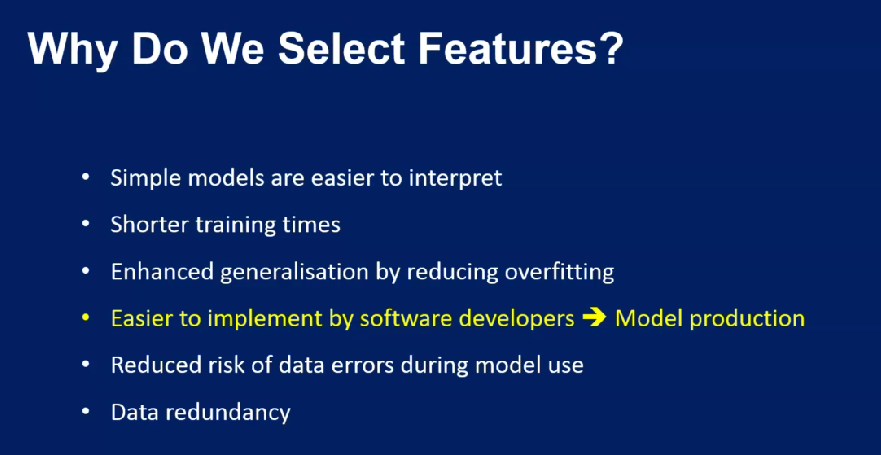

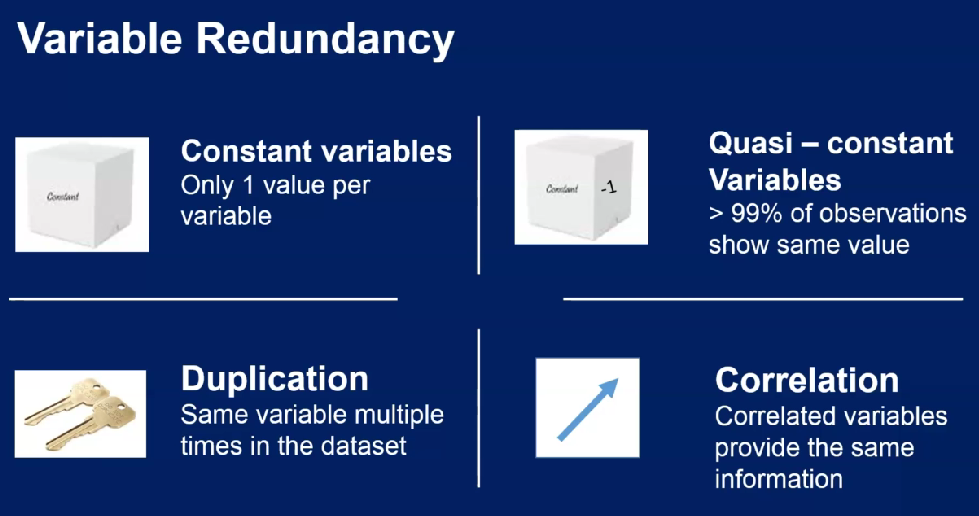

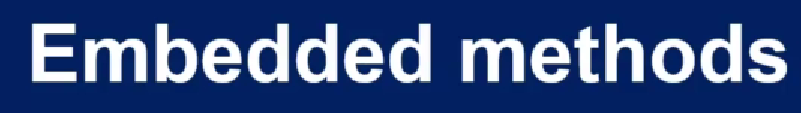

### calculate the correlation matrix for all variables

C:\Users\PC\AppData\Local\Temp\ipykernel_4628\929843386.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


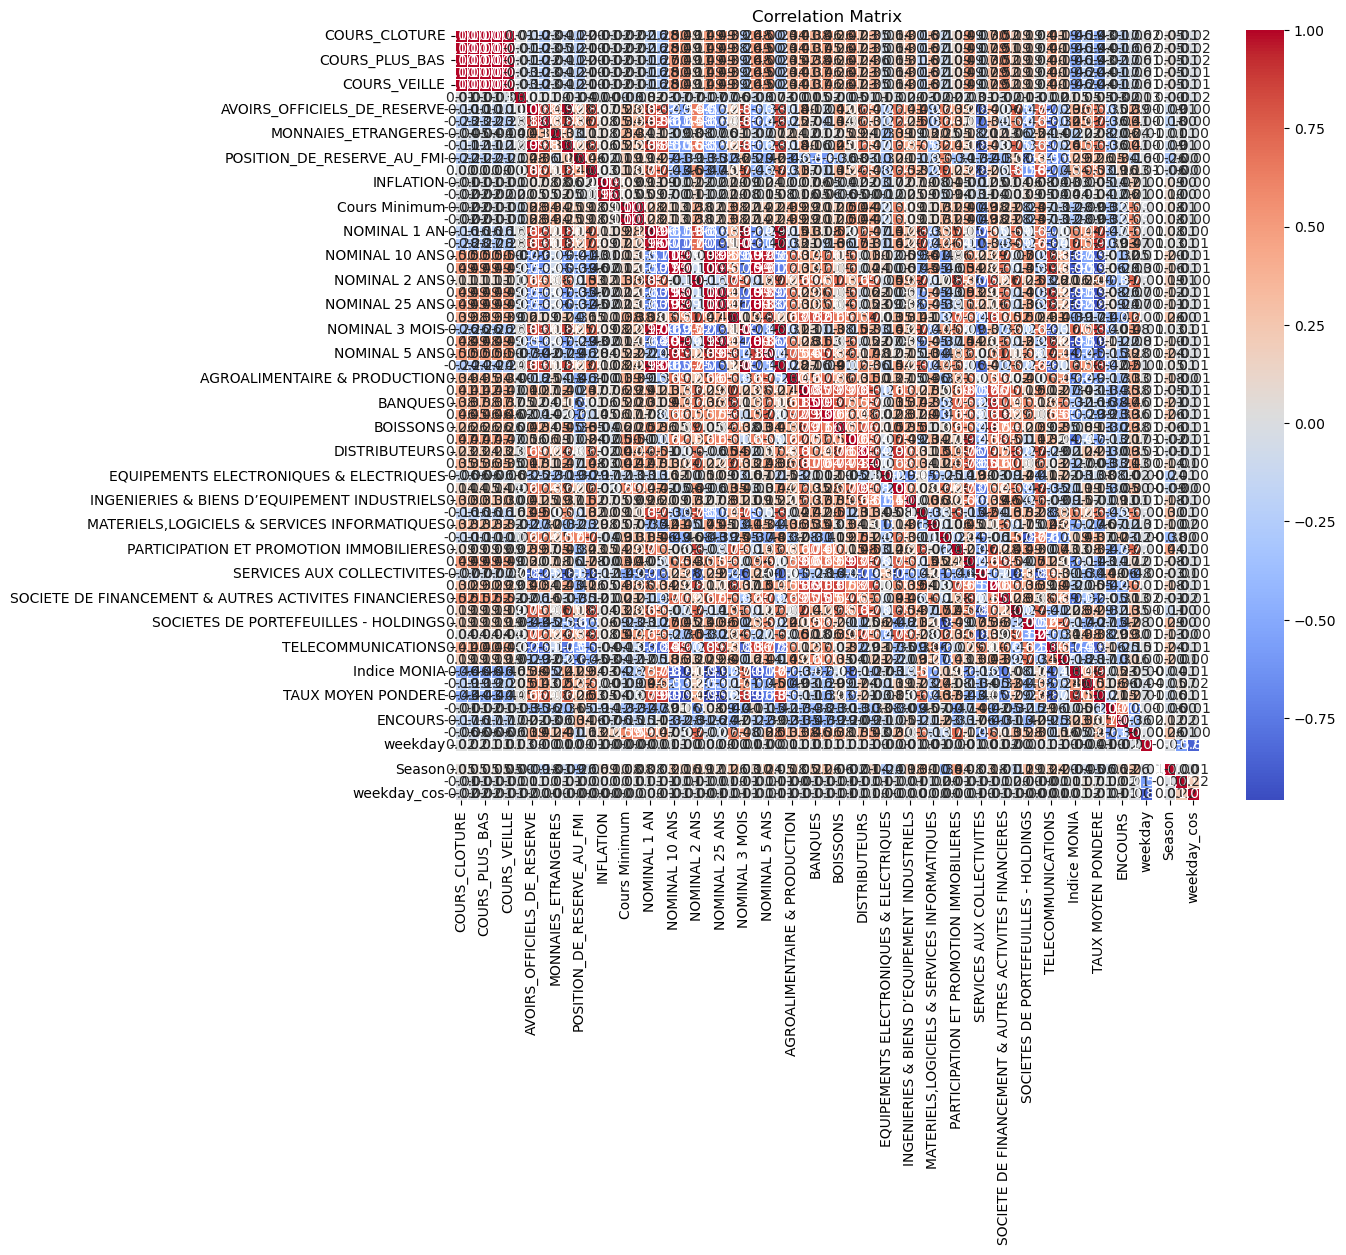

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [92]:
# Set the correlation threshold
correlation_threshold = 0.95

# Find highly correlated variable pairs
highly_correlated_pairs = []
correlation_matrix = df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            col_i = correlation_matrix.columns[i]
            col_j = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            highly_correlated_pairs.append((col_i, col_j, correlation_value))

# Print the highly correlated variable pairs
for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]} are highly correlated with a coefficient of {pair[2]:.2f}")


C:\Users\PC\AppData\Local\Temp\ipykernel_4628\2131826575.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


COURS_CLOTURE and COURS_PLUS_HAUT are highly correlated with a coefficient of 1.00
COURS_CLOTURE and COURS_PLUS_BAS are highly correlated with a coefficient of 1.00
COURS_CLOTURE and COURS_OUVERTURE are highly correlated with a coefficient of 1.00
COURS_CLOTURE and COURS_VEILLE are highly correlated with a coefficient of 1.00
COURS_PLUS_HAUT and COURS_PLUS_BAS are highly correlated with a coefficient of 1.00
COURS_PLUS_HAUT and COURS_OUVERTURE are highly correlated with a coefficient of 1.00
COURS_PLUS_HAUT and COURS_VEILLE are highly correlated with a coefficient of 1.00
COURS_PLUS_BAS and COURS_OUVERTURE are highly correlated with a coefficient of 1.00
COURS_PLUS_BAS and COURS_VEILLE are highly correlated with a coefficient of 1.00
COURS_OUVERTURE and COURS_VEILLE are highly correlated with a coefficient of 1.00
AVOIRS_OFFICIELS_DE_RESERVE and DEPOTS_ET_TITRES are highly correlated with a coefficient of 0.99
INFLATION and INFLATION_SOUS_JACENTE are highly correlated with a coefficien

### Remove One of the Highly Correlated Variables:

In Our case, variables like COURS_PLUS_HAUT, COURS_PLUS_BAS, COURS_OUVERTURE, and COURS_VEILLE are highly correlated with COURS_CLOTURE with a coefficient of 1.00. I can choose to keep only one of these variables and drop the others.

In [93]:
# List of highly correlated variable pairs
correlated_pairs_to_drop = [
    ('COURS_CLOTURE', 'COURS_PLUS_HAUT'),
    ('COURS_CLOTURE', 'COURS_PLUS_BAS'),
    ('COURS_CLOTURE', 'COURS_OUVERTURE'),
    ('COURS_CLOTURE', 'COURS_VEILLE'),
    ('COURS_PLUS_HAUT', 'COURS_PLUS_BAS'),
    ('COURS_PLUS_HAUT', 'COURS_OUVERTURE'),
    ('COURS_PLUS_HAUT', 'COURS_VEILLE'),
    ('COURS_PLUS_BAS', 'COURS_OUVERTURE'),
    ('COURS_PLUS_BAS', 'COURS_VEILLE'),
    ('COURS_OUVERTURE', 'COURS_VEILLE'),
    ('AVOIRS_OFFICIELS_DE_RESERVE', 'DEPOTS_ET_TITRES'),
    ('INFLATION', 'INFLATION_SOUS_JACENTE'),
    ('Cours Minimum', 'Cours Maximum'),
    ('NOMINAL 1 AN', 'NOMINAL 1 MOIS'),
    ('NOMINAL 1 AN', 'NOMINAL 3 MOIS'),
    ('NOMINAL 1 AN', 'NOMINAL 6 MOIS'),
    ('NOMINAL 1 MOIS', 'NOMINAL 3 MOIS'),
    ('NOMINAL 1 MOIS', 'NOMINAL 6 MOIS'),
    ('NOMINAL 10 ANS', 'NOMINAL 15 ANS'),
    ('NOMINAL 10 ANS', 'NOMINAL 20 ANS'),
    ('NOMINAL 10 ANS', 'NOMINAL 25 ANS'),
    ('NOMINAL 10 ANS', 'NOMINAL 30 ANS'),
    ('NOMINAL 15 ANS', 'NOMINAL 20 ANS'),
    ('NOMINAL 15 ANS', 'NOMINAL 25 ANS'),
    ('NOMINAL 15 ANS', 'NOMINAL 30 ANS'),
    ('NOMINAL 20 ANS', 'NOMINAL 25 ANS'),
    ('NOMINAL 20 ANS', 'NOMINAL 30 ANS'),
    ('NOMINAL 3 MOIS', 'NOMINAL 6 MOIS'),
]

        
# Create a set to keep track of dropped variables
dropped_variables = set()

# Drop one variable from each pair
for pair in correlated_pairs_to_drop:
    # Check if either variable in the pair exists in the DataFrame and has not been dropped
    if pair[0] in df.columns and pair[0] not in dropped_variables:
        df.drop(pair[1], axis=1, inplace=True)
        dropped_variables.add(pair[1])
    elif pair[1] in df.columns and pair[1] not in dropped_variables:
        df.drop(pair[0], axis=1, inplace=True)
        dropped_variables.add(pair[0])

In [94]:
df.head()

,DATE,COURS_CLOTURE,VARIATION,AVOIRS_OFFICIELS_DE_RESERVE,OR_MONETAIRE,MONNAIES_ETRANGERES,POSITION_DE_RESERVE_AU_FMI,AVOIRS_EN_DTS,INFLATION,Cours Minimum,NOMINAL 1 AN,NOMINAL 10 ANS,NOMINAL 2 ANS,NOMINAL 3 ANS,NOMINAL 5 ANS,AGROALIMENTAIRE & PRODUCTION,ASSURANCES,BANQUES,BATIMENT & MATERIAUX DE CONSTRUCTION,BOISSONS,CHIMIE,DISTRIBUTEURS,ELECTRICITE,EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES,INDUSTRIE PHARMACEUTIQUE,INGENIERIES & BIENS D’EQUIPEMENT INDUSTRIELS,LOISIRS ET HOTELS,"MATERIELS,LOGICIELS & SERVICES INFORMATIQUES",MINES,PARTICIPATION ET PROMOTION IMMOBILIERES,PETROLE & GAZ,SERVICES AUX COLLECTIVITES,SERVICES DE TRANSPORT,SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINANCIERES,SOCIETES DE PLACEMENT IMMOBILIER,SOCIETES DE PORTEFEUILLES - HOLDINGS,SYLVICULTURE & PAPIER,TELECOMMUNICATIONS,TRANSPORT,Indice MONIA,Volume JJ,TAUX MOYEN PONDERE,VOLUME JJ,ENCOURS,month,weekday,weekend,Season,weekday_sin,weekday_cos
177,2013-12-06,9240.41,-0.009317,349.865853,14.191342,11.426886,1.977989,18.955415,8.3,9.365992,154.593025,180.678428,158.508979,161.286817,167.263579,31801.412143,5006.905,13359.142381,18560.281667,14585.499286,4183.715536,38372.916488,2255.716369,2071.234494,5866.859762,88.522857,934.742083,2458.707679,22809.748393,5798.094524,15343.102381,1048.016558,4185.055714,7488.461369,1041.993571,5538.568929,29.415833,1368.041667,2414.6275,2.947966,8495.827586,2.991124,1762.846154,7030.650888,12,4,False,3,-8.660254e-01,-0.5
176,2013-12-09,9221.40,-0.002057,349.470283,14.174735,11.512905,1.977482,18.873953,8.3,9.364884,154.547102,180.738401,158.469820,161.257384,167.257344,31796.374286,5003.180,13352.244762,18548.653333,14583.658571,4182.481071,38331.562976,2254.452738,2081.928539,5849.489524,88.395714,932.234167,2458.815357,22800.006786,5778.049048,15340.654762,1051.071129,4179.341429,7488.212738,1041.287143,5537.097857,29.351667,1372.593333,2414.3950,2.942931,8508.655172,2.982249,1765.692308,7031.301775,12,0,False,3,0.000000e+00,1.0
175,2013-12-10,9241.40,0.002169,349.074712,14.158127,11.598925,1.976975,18.792491,8.3,9.363775,154.501179,180.798374,158.430662,161.227952,167.251109,31791.336429,4999.455,13345.347143,18537.025000,14581.817857,4181.246607,38290.209464,2253.189107,2092.622584,5832.119286,88.268571,929.726250,2458.923036,22790.265179,5758.003571,15338.207143,1054.125701,4173.627143,7487.964107,1040.580714,5535.626786,29.287500,1377.145000,2414.1625,2.937897,8521.482759,2.973373,1768.538462,7031.952663,12,1,False,3,8.660254e-01,0.5
174,2013-12-11,9252.30,0.001179,348.679142,14.141520,11.684944,1.976468,18.711030,8.3,9.362667,154.455256,180.858347,158.391504,161.198519,167.244873,31786.298571,4995.730,13338.449524,18525.396667,14579.977143,4180.012143,38248.855952,2251.925476,2103.316629,5814.749048,88.141429,927.218333,2459.030714,22780.523571,5737.958095,15335.759524,1057.180272,4167.912857,7487.715476,1039.874286,5534.155714,29.223333,1381.696667,2413.9300,2.932862,8534.310345,2.964497,1771.384615,7032.603550,12,2,False,3,8.660254e-01,-0.5
173,2013-12-12,9320.66,0.007388,348.283571,14.124913,11.770964,1.975960,18.629568,8.3,9.361559,154.409333,180.918319,158.352345,161.169087,167.238638,31781.260714,4992.005,13331.551905,18513.768333,14578.136429,4178.777679,38207.502440,2250.661845,2114.010674,5797.378810,88.014286,924.710417,2459.138393,22770.781964,5717.912619,15333.311905,1060.234844,4162.198571,7487.466845,1039.167857,5532.684643,29.159167,1386.248333,2413.6975,2.927828,8547.137931,2.955621,1774.230769,7033.254438,12,3,False,3,1.224647e-16,-1.0


# <p style="border-radius: 10px; border: solid rgb(222, 184, 135); padding: 25px; background-color: rgb(255, 250, 240); font-size: 100%; color: rgb(82, 1, 122); text-align: center; --darkreader-inline-border-top: #744f20; --darkreader-inline-border-right: #744f20; --darkreader-inline-border-bottom: #744f20; --darkreader-inline-border-left: #744f20; --darkreader-inline-bgcolor: #3c2800; --darkreader-inline-color: #d177fe;">MODELING</p>

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam

In [96]:
df.loc[:,["weekday","weekend"]]

,weekday,weekend
177,4,False
176,0,False
175,1,False
174,2,False
173,3,False
...,...,...
182,1,False
181,2,False
180,2,False
178,3,False


In [97]:
df = df.copy()

X = df.drop(['COURS_CLOTURE','DATE',], axis=1)  # Features
# X = df.loc[:,["weekday"]]
y = df['COURS_CLOTURE']  # Target variable

# Normalize data
scaler = MinMaxScaler()
X = scaler.fit_transform(X, df.values.reshape(-1,1))


# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [416]:
print(X)

[[0.42816666 0.88074471 0.89877251 ... 1.         0.         0.25      ]
 [0.42898233 0.87733289 0.89466212 ... 1.         0.5        1.        ]
 [0.42945718 0.87392108 0.89055173 ... 1.         1.         0.75      ]
 ...
 [0.43820225 0.89098014 0.91110369 ... 1.         1.         0.25      ]
 [0.42696629 0.88415652 0.9028829  ... 1.         0.5        0.        ]
 [0.42696629 0.88756833 0.90699329 ... 1.         0.5        0.        ]]


<h1 class="alert alert-info">
LSTM MODEL<h1>

<h1 class="alert alert-info">
Simple NN MODEL<h1>

In [417]:
x_train.shape

(3963, 48)

In [396]:
def NN_model_test():
    # Create a Sequential model
    model = Sequential()

    # Add input layer
    model.add(Dense(units=128, activation='relu', input_dim=x_train.shape[1]))
    model.add(Dropout(0.2))

    # Add hidden layers
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.2))

    # Add output layer
    model.add(Dense(units=1, activation='linear'))
    
    return model

In [418]:
def improved_NN_model():
    # Create a Sequential model
    model = Sequential()

    # Add input layer
    model.add(Dense(units=256, activation='relu', input_dim=x_train.shape[1]))
    model.add(Dropout(0.3))  # Adjust dropout

    # Add hidden layers
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.3))  # Adjust dropout

    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.3))  # Adjust dropout

    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))  # Adjust dropout

    # Add output layer
    model.add(Dense(units=1, activation='linear'))

    return model

In [419]:
from keras.optimizers import Adam
import sklearn.metrics as metrics


model = improved_NN_model()
# model.summary()

custom_optimizer = Adam(learning_rate=0.001)

model.compile(
    optimizer=custom_optimizer,
    loss='mean_absolute_error',
    metrics=['mae']
)


In [420]:
# Define callbacks

# Save weights only for best model
checkpointer = ModelCheckpoint(
    filepath = '../models/weights_best.h5', 
    verbose = 2, 
    save_best_only = True
)

retVal = model.fit(
    x_train, 
    y_train,
    validation_data=(x_test, y_test),
    epochs=50, 
    batch_size = 32,
    callbacks = [checkpointer]
)

Epoch 1/50
121/124 [============================>.] - ETA: 0s - loss: 7634.9233 - mae: 7634.9233
Epoch 1: val_loss improved from inf to 1383.47961, saving model to ../models\weights_best.h5
124/124 [==============================] - 9s 10ms/step - loss: 7520.5171 - mae: 7520.5171 - val_loss: 1383.4796 - val_mae: 1383.4796
Epoch 2/50
  8/124 [>.............................] - ETA: 0s - loss: 2728.5774 - mae: 2728.5774

C:\Users\Honor\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


118/124 [===========================>..] - ETA: 0s - loss: 2456.7334 - mae: 2456.7334
Epoch 2: val_loss improved from 1383.47961 to 1227.60266, saving model to ../models\weights_best.h5
124/124 [==============================] - 1s 7ms/step - loss: 2449.6050 - mae: 2449.6050 - val_loss: 1227.6027 - val_mae: 1227.6027
Epoch 3/50
122/124 [============================>.] - ETA: 0s - loss: 2189.2737 - mae: 2189.2737
Epoch 3: val_loss improved from 1227.60266 to 945.56525, saving model to ../models\weights_best.h5
124/124 [==============================] - 1s 8ms/step - loss: 2188.5496 - mae: 2188.5496 - val_loss: 945.5652 - val_mae: 945.5652
Epoch 4/50
118/124 [===========================>..] - ETA: 0s - loss: 2112.6665 - mae: 2112.6665
Epoch 4: val_loss did not improve from 945.56525
124/124 [==============================] - 1s 8ms/step - loss: 2113.3491 - mae: 2113.3491 - val_loss: 1007.2803 - val_mae: 1007.2803
Epoch 5/50
119/124 [===========================>..] - ETA: 0s - loss: 2076.

## Archetect : NN_model_test
- 5 epochs : loss: 7274735.0000 - mae: 2204.3425 - val_loss: 4265903.5000 - val_mae: 1686.3789
- 50 epochs: loss: 1525.7279 - mae: 1525.7279 - val_loss: 874.1859 - val_mae: 874.1859
<hr>
custom_optimizer: 0.001
- 50 epochs: loss: 1559.3093 - mae: 1559.3093 - val_loss: 835.0258 - val_mae: 835.0258
<hr>
custom_optimizer: 0.0001
- 50 epochs: loss: 1685.5854 - mae: 1685.5854 - val_loss: 986.6269 - val_mae: 986.6269
## Archetect : improved_NN_model_test
- loss: 1971.5782 - mae: 1971.5782 - val_loss: 833.5898 - val_mae: 833.5898

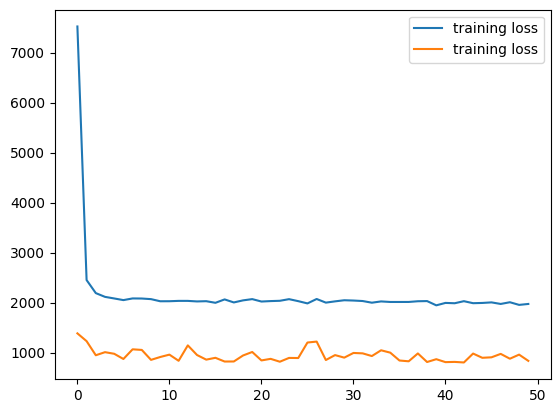

In [421]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['val_loss'], label = 'training loss')
plt.legend()

<h1 class="alert alert-info">
LSTM MODEL<h1>

<hr>
<hr>

In [424]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

def better_LSTM_model():
    model = Sequential()

    # Increase the number of LSTM units
    model.add(LSTM(units=256, activation='relu', input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.5))  # Increase dropout rate

    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(units=1, activation='linear'))

    return model

x_train_lstm = x_train_scaled.reshape((x_train_scaled.shape[0], x_train_scaled.shape[1], 1))

model_lstm = better_LSTM_model()
model_lstm.summary()

custom_optimizer = Adam(learning_rate=0.0001)  # Decrease the learning rate

model_lstm.compile(
    optimizer=custom_optimizer,
    loss='mean_absolute_error',
    metrics=['mae']
)

# Use EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_lstm.fit(
    x_train_lstm,
    y_train,
    validation_split=0.2,
    epochs=100,  # You can experiment with the number of epochs
    batch_size=32,
    callbacks=[checkpointer, early_stopping]
)


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_45 (LSTM)              (None, 256)               264192    
                                                                 
 dropout_91 (Dropout)        (None, 256)               0         
                                                                 
 dense_76 (Dense)            (None, 128)               32896     
                                                                 
 dropout_92 (Dropout)        (None, 128)               0         
                                                                 
 dense_77 (Dense)            (None, 64)                8256      
                                                                 
 dropout_93 (Dropout)        (None, 64)                0         
                                                                 
 dense_78 (Dense)            (None, 1)               

Epoch 25/100
 99/100 [============================>.] - ETA: 0s - loss: 2440.3796 - mae: 2440.3796
Epoch 25: val_loss did not improve from 823.18646
100/100 [==============================] - 9s 92ms/step - loss: 2438.9534 - mae: 2438.9534 - val_loss: 1622.0098 - val_mae: 1622.0098
Epoch 26/100
 99/100 [============================>.] - ETA: 0s - loss: 2413.9197 - mae: 2413.9197
Epoch 26: val_loss did not improve from 823.18646
100/100 [==============================] - 9s 94ms/step - loss: 2413.0671 - mae: 2413.0671 - val_loss: 2163.7070 - val_mae: 2163.7070
Epoch 27/100
100/100 [==============================] - ETA: 0s - loss: 2403.9282 - mae: 2403.9282
Epoch 27: val_loss did not improve from 823.18646
100/100 [==============================] - 11s 112ms/step - loss: 2403.9282 - mae: 2403.9282 - val_loss: 1523.0023 - val_mae: 1523.0023
Epoch 28/100
100/100 [==============================] - ETA: 0s - loss: 2325.2876 - mae: 2325.2876
Epoch 28: val_loss did not improve from 823.18646


# Evaluation

In [425]:
# Generate price predictions using the LSTM model
predicted_prices = model_lstm.predict(x_test)

31/31 [==============================] - 2s 34ms/step


Text(0, 0.5, 'Predictions ')

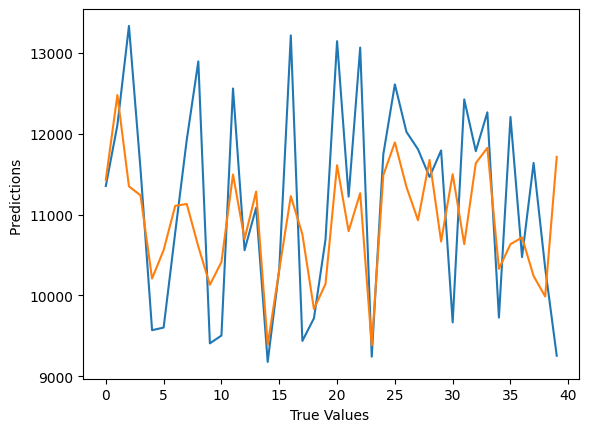

In [459]:
test_len = [i for i in range(len(y_test))]

number_of_samples = 40
plt.plot(test_len[:number_of_samples], y_test[:number_of_samples])
plt.plot(test_len[:number_of_samples], predicted_prices[:number_of_samples])

plt.xlabel('True Values ')
plt.ylabel('Predictions ')
